<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9C%EC%99%80%20%ED%96%89%EB%A0%AC%EC%97%B0%EC%82%B0%20%EC%98%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer

In [56]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

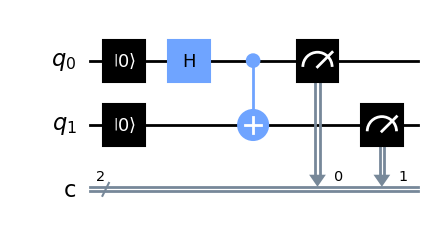

In [57]:
circuit.draw('mpl')

In [81]:
import numpy as np
# |0>과 H Gate 내적 연산
hgate = np.array([[1 / np.sqrt(2), 1 / np.sqrt(2)],
              [1 / np.sqrt(2), -(1 / np.sqrt(2))]])
q0 = np.array([1,
               0])
c0 = np.dot(hgate, q0)
print(c0)

[0.70710678 0.70710678]


In [82]:
# c0의 결과와 |0>의 텐서곱
q1 = np.array([0, 1])
d = np.kron(c0, q1)
print(d)

[0.         0.70710678 0.         0.70710678]


In [83]:
# 텐서곱 결과와 CNOT Gate 내적연산
cnotgate = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
e = np.dot(cnotgate, d)
print(e)

[0.         0.70710678 0.70710678 0.        ]


In [84]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit import Aer, execute, transpile, assemble

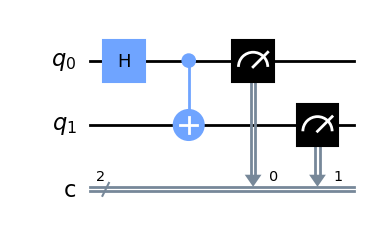

In [85]:
backend = Aer.get_backend('qasm_simulator') # Cloud상 시뮬레이터
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

In [86]:
from qiskit.providers.jobstatus import JobStatus
import time

job = execute(transpiled_circuit, backend, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(1)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

Job status is JobStatus.INITIALIZING
Job status is JobStatus.DONE
{'00': 538, '11': 486}


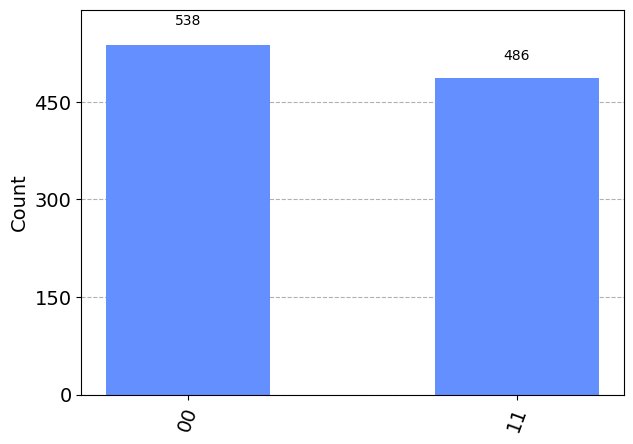

In [87]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

In [88]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit1 = QuantumCircuit(qreg_q, creg_c)

circuit1.reset(qreg_q[0])
circuit1.reset(qreg_q[1])
circuit1.h(qreg_q[0])
circuit1.cx(qreg_q[0], qreg_q[1])
circuit1.measure(qreg_q[0], creg_c[0])
circuit1.measure(qreg_q[1], creg_c[1])

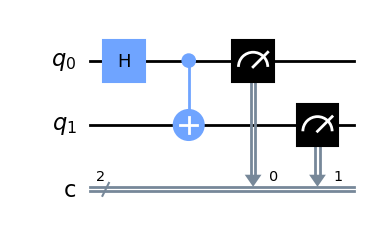

In [89]:
backend = Aer.get_backend('statevector_simulator') # Cloud상 시뮬레이터
transpiled_circuit = transpile(circuit1, backend)
transpiled_circuit.draw('mpl')

In [90]:
from qiskit.providers.jobstatus import JobStatus
import time

job = execute(transpiled_circuit, backend, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(1)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
#counts = result.get_counts()
psi = result.get_statevector(experiment=circuit1)
print(psi)

Job status is JobStatus.INITIALIZING
Job status is JobStatus.DONE
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


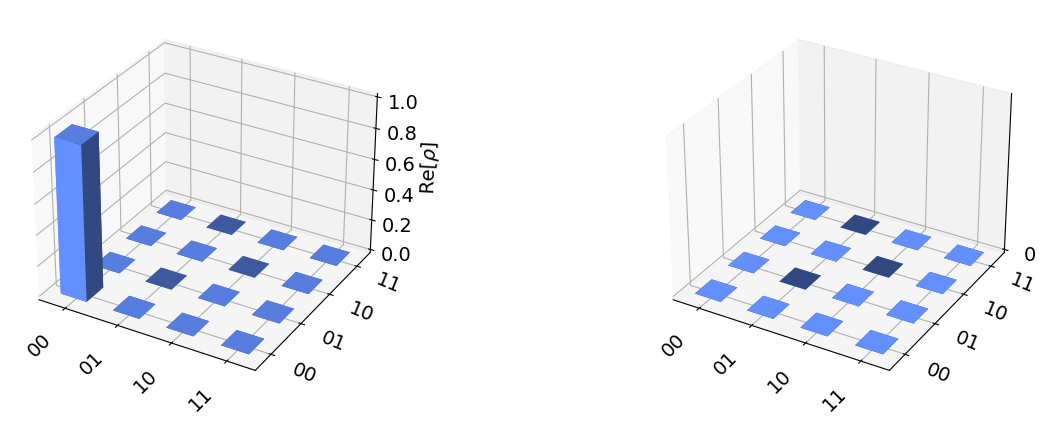

In [91]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
plot_state_city(state=psi)

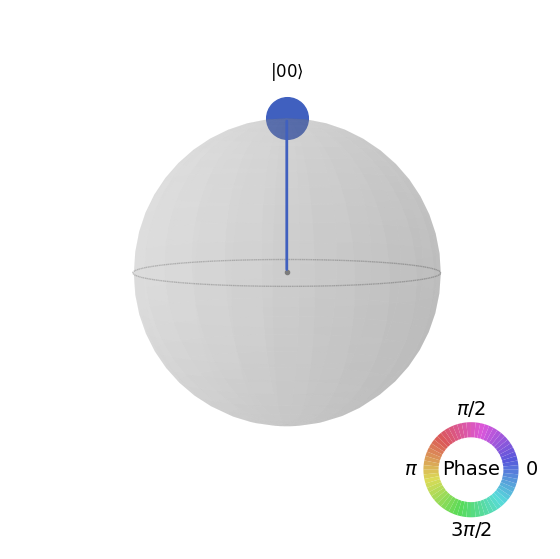

In [92]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(state=psi)

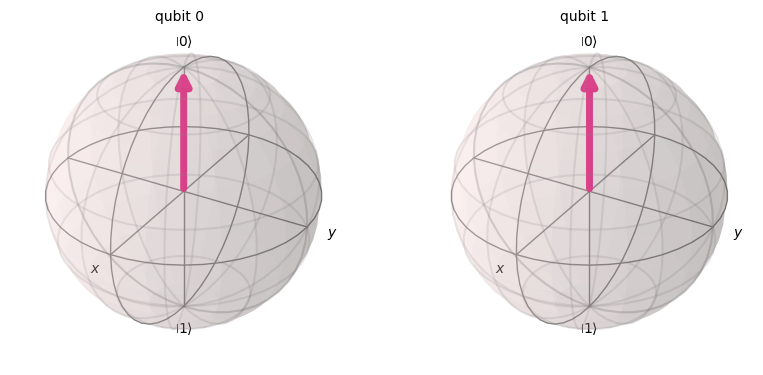

In [93]:
plot_bloch_multivector(state=psi)